para este ejercicio se agregaron valores atipicos a el dataset de felicidad con el fin de implementar regresiones robustas y trabajar esos valores al mismo tiempo que se crea el modelo de ML

In [2]:
import pandas as pd

from sklearn.linear_model import(
  RANSACRegressor, HuberRegressor
)

from sklearn.svm import SVR

In [3]:
# Importamos las metricas de entrenamiento y el error medio cuadrado
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
import pathlib
pathlib.Path()
CURRENT_DIRT = pathlib.Path().resolve()


In [6]:
df = pd.read_csv(CURRENT_DIRT.parent.joinpath("data","felicidad_corrupt.csv"))
df.tail(5)

# podemos ver que los ultimos valores el DF son outsiders 

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
162,H,163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,I,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,J,165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,K,166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,L,167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = df.drop(["country", "score", "rank"], axis= 1)
y = df["score"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [24]:
estimators = {
  "SVR": SVR(gamma="auto", C=1.0, epsilon=0.1),
  "RANSAC": RANSACRegressor(),
  "HUBER":  HuberRegressor(epsilon=1.35)
}

In [15]:
import warnings
warnings.simplefilter("ignore")

In [26]:
import matplotlib.pyplot as plt


SVR
MSE:  0.005844139576335353


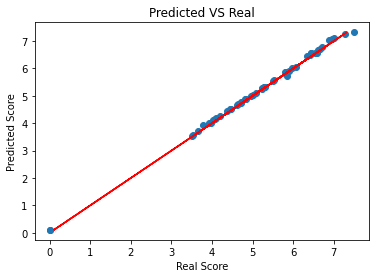

RANSAC
MSE:  1.2666592316953863e-19


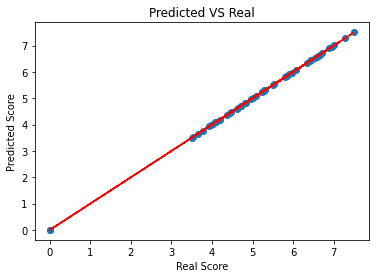

HUBER
MSE:  5.506690207048251e-10


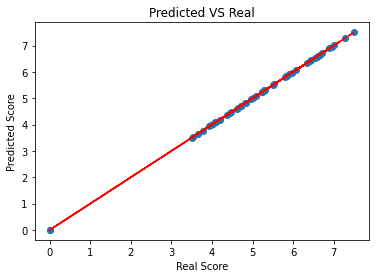

In [27]:
for name, estimator in estimators.items():
        estimator.fit(X_train, y_train)
        predictions = estimator.predict(X_test)
        print("="*64)
        print(name)
        print("MSE: ", mean_squared_error(y_test, predictions))

        plt.ylabel('Predicted Score')
        plt.xlabel('Real Score')
        plt.title('Predicted VS Real')
        plt.scatter(y_test, predictions)
        plt.plot(predictions, predictions,'r--')
        plt.show()

        


Un resumen de esta seccion

En regresion lineal podemos utilizar otros estimadores para evaluar el MSE (error)

-SVR
-RANSAC
-HUBER

Escogemos entre los 3 el que nos de el menor valor de error.

Es de tener cuidado que el menor estimador puede estar en notacion cientifica